In [1]:
# Importing the essential Python Libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('fivethirtyeight')
from pandas.plotting import scatter_matrix

In [2]:
# Importing the Parkinson's Telemonitoring dataset

df = pd.read_csv('parkinsons_updrs.csv')

In [3]:
# Checking the first 5 columns of the dataset

df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [4]:
# Defining the dependent and the predictors or independent variables

dependent = 'total_UPDRS'
predictors = [colname for colname in df.columns if colname not in ['motor_UPDRS','total_UPDRS']]

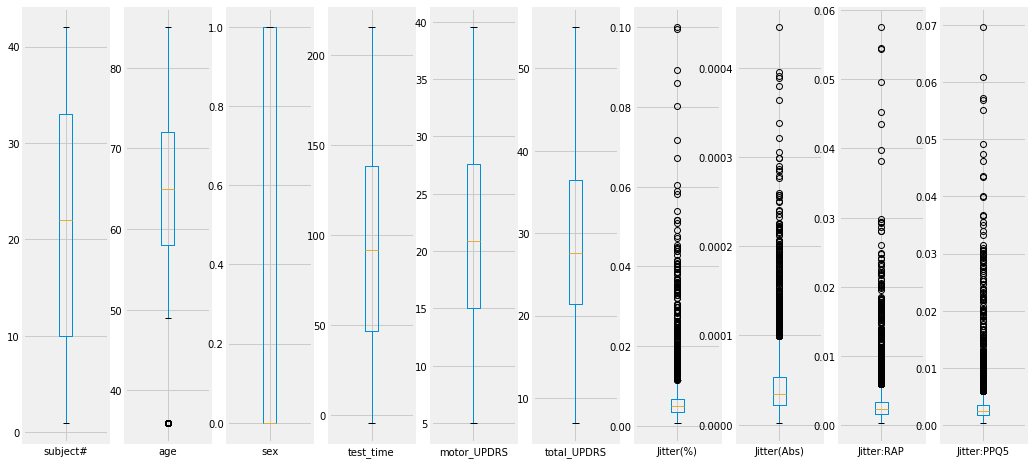

In [5]:
# Creating Boxplots for the firs 10 columns of the dataset 

boxplots1 = df[df.columns[:10]].plot(subplots=True, kind='box', figsize=(16,8))

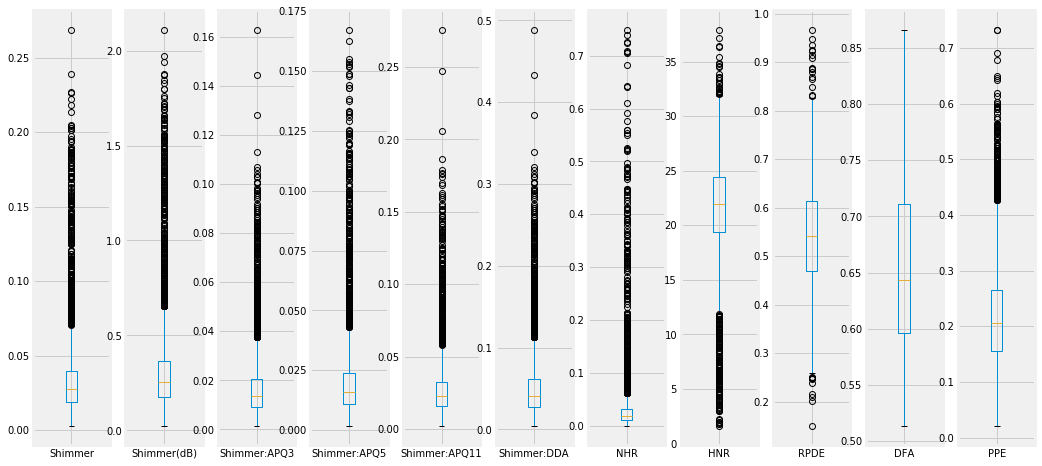

In [6]:
# Creating Boxplots for the remainder columns of the dataset

boxplots2 = df[df.columns[11:]].plot(subplots=True, kind='box', figsize=(16,8))

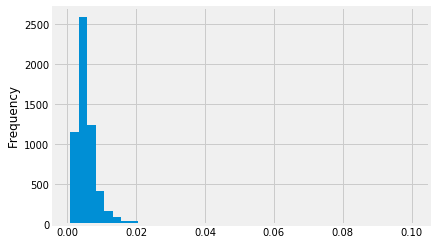

In [7]:
# Plotting a histogram for one of the predictor variable

hist_ex = df['Jitter(%)'].plot(kind='hist', bins=40)

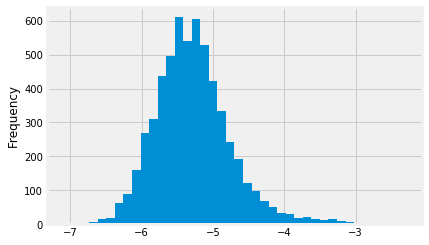

In [8]:
# Taking a Log and plotting a histogram of the same predictor variable

hist_log_ex = df['Jitter(%)'].apply(np.log)

hist_log_ex.plot(kind='hist', bins=40)

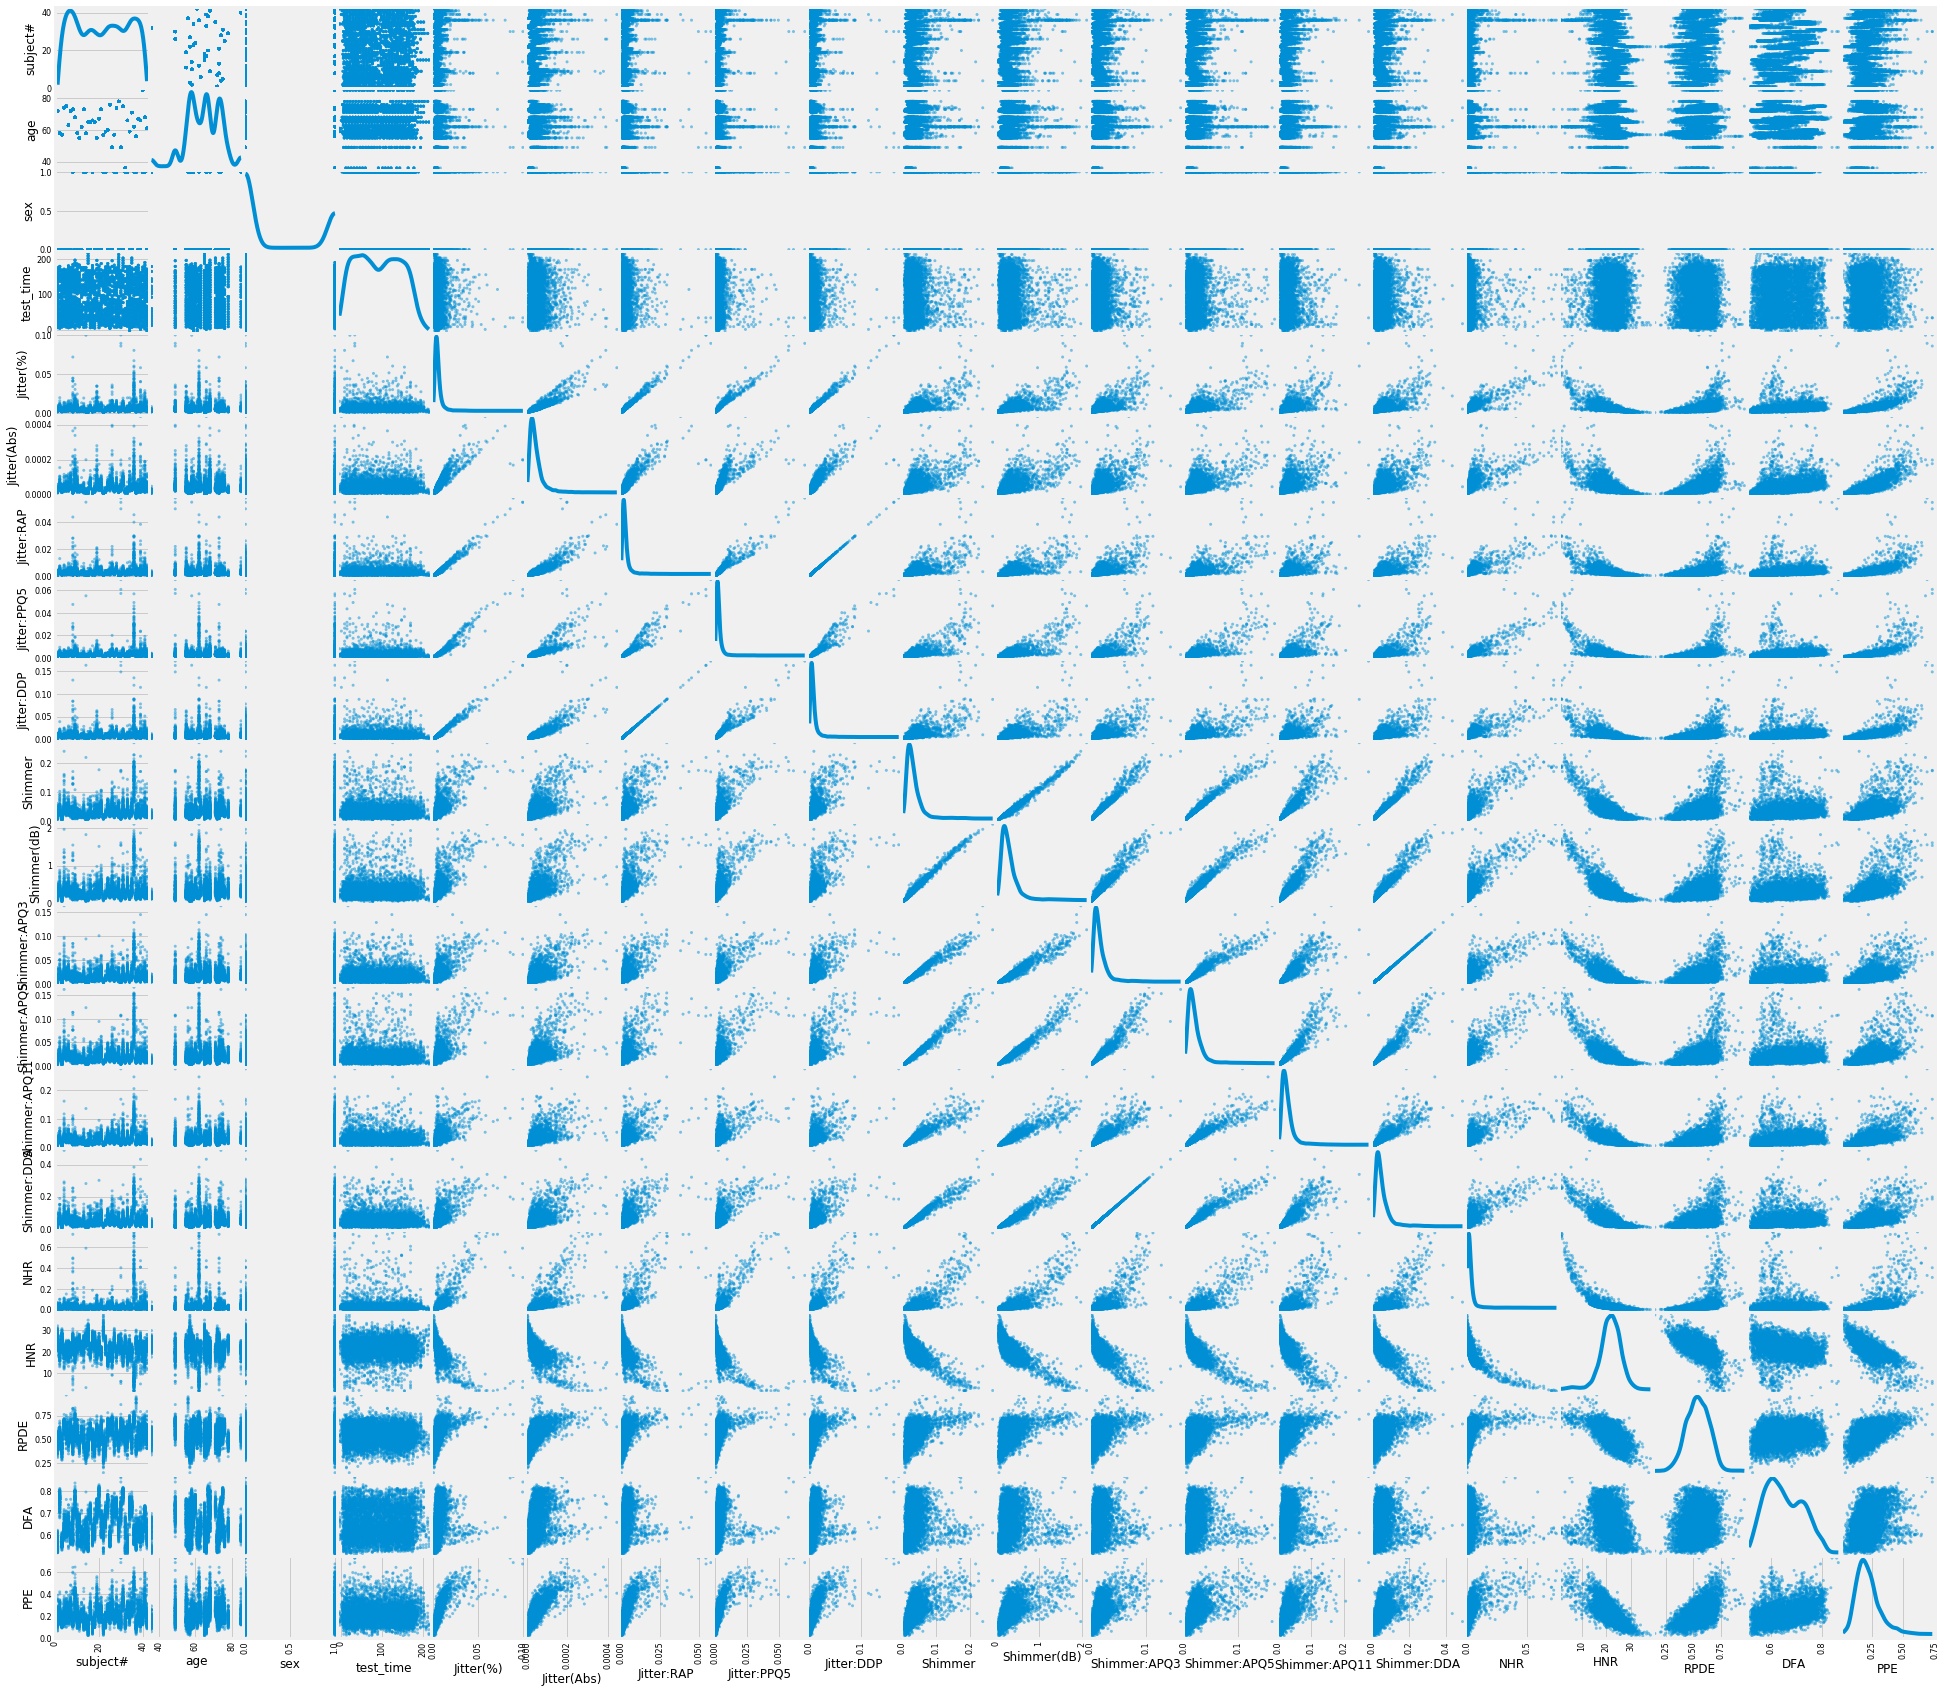

In [9]:
# Plotting a scatter matrix to check for multicollinearity in the predictor variables

plot = scatter_matrix(df[predictors], diagonal='kde', figsize=(30,30))

In [10]:
# Eliminating the predictor variables with high multicollinearity

predictors.remove('Jitter:DDP')
predictors.remove('Shimmer:DDA')

In [11]:
# Taking a log of the Jitter, Shimmer, NHR and PPE predictor variables

predictors_to_log = [predictor for predictor in predictors if any(lookforstring in predictor for lookforstring in ('Shimmer','Jitter','NHR', 'PPE'))]

In [12]:
# Defining the series of columns to which a log function has to be applied

def log_columns(series):
    if series.name in predictors_to_log:
        return np.log(series)
    else:
        return series
    
final_df = df.apply(log_columns)

In [13]:
#Ordinary Least Squares Estimation

model = sm.OLS(final_df[dependent], exog=final_df[predictors])

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     3307.
Date:                Sun, 11 Nov 2018   Prob (F-statistic):               0.00
Time:                        14:13:03   Log-Likelihood:                -21410.
No. Observations:                5875   AIC:                         4.286e+04
Df Residuals:                    5857   BIC:                         4.298e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
subject#          0.2617      0.011     23.956      0.000       0.240       0.283
age               0.3438      0.014     23.997      0.000       0.316       0.372
sex              -5.8890      0.370    -15.923      0.000      -6.614      -5.164
test_time         0.0160      0.002      7.004      0.000       0.011       0.020
Jitter(%)        -1.3056      1.521     -0.858      0.391      -4.288       1.677
Jitter(Abs)      -3.2420      0.585     -5.546      0.000      -4.388      -2.096
Jitter:RAP        6.0752      1.077      5.641      0.000       3.964       8.187
Jitter:PPQ5      -1.4765      1.091     -1.353      0.176      -3.615       0.662
Shimmer          -4.4696      2.971     -1.504      0.133     -10.294       1.355
Shimmer(dB)       4.4610      1.493      2.988      0.003       1.535       7.387
Shimmer:APQ3     -1.2165      1.758     -0.692      0.489      -4.662       2.229
Shimmer:APQ5     -3.5919      1.893     -1.897      0.058      -7.303       0.119
Shimmer:APQ11     2.9774      1.220      2.441      0.015       0.586       5.369
NHR              -1.6868      0.347     -4.863      0.000      -2.367      -1.007
HNR              -0.6291      0.079     -8.010      0.000      -0.783      -0.475
RPDE              5.8762      1.683      3.491      0.000       2.576       9.176
DFA             -32.7859      1.931    -16.974      0.000     -36.572     -28.999
PPE               2.6293      0.605      4.346      0.000       1.443       3.815
==============================================================================
Omnibus:                      129.234   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.711
Skew:                           0.241   Prob(JB):                     8.20e-23
Kurtosis:                       2.571   Cond. No.                     3.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""